# Curvilinear coordinates

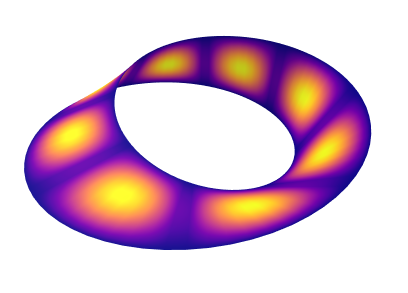

Shenfun automates curvilinear coordinates! To this end we make heavily use of [sympy](https://sympy.org) for symbolic mathematics in Python. First some background on curvilinear coordinates:

The position vector $\mathbf{r}$ in three-dimensional Cartesian coordinates is given as

$$
\mathbf{r} = x^1 \mathbf{i}_1 + x^2 \mathbf{i}_2 + x^3 \mathbf{i}_3 
$$

where $\mathbf{i}_1, \mathbf{i}_2, \mathbf{i}_3$ are the unit basisvectors for the three spatial dimensions. This is very often written as

$$
\mathbf{r} = x \mathbf{i} + y \mathbf{j} + z \mathbf{k},
$$

but we will use the numbered version below, because it is numbered. 

We write for a point $\mathbf{x}$

$$
\mathbf{x} = (x^1, x^2, x^3).
$$

A new curvilinear coordinate system with coordinate curves $q^1=q^1(\mathbf{x}), q^2=q^2(\mathbf{x})$ and $ q^3=q^3(\mathbf{x})$ can be defined, and we can get back to the Cartesian coordinate system through the inverse maps

$$
x^1=x^1(\mathbf{q}) \quad x^2=x^2(\mathbf{q}) \quad x^3=x^3(\mathbf{q}),
$$

using notation

$$
\mathbf{q} = (q^1, q^2, q^3).
$$

The position vector can now be written as a function of the new coordinates

$$
\mathbf{r} = x^i(\mathbf{q}) \,\mathbf{i}_i,
$$

with summation on repeated indices $i$.

For example, for cylindrical coordinates we have 

$$
 q^1, q^2, q^3 = r, \theta, z,
$$

where $r, \theta, z$ are the radial position, the azimuthal angle, and the position along the length of the cylinder, respectively. The position vector is given in terms of these new coordinates as

$$
\mathbf{r} = r\cos \theta \,\mathbf{i}_1 + r\sin \theta \,\mathbf{i}_2 + z \,\mathbf{i}_2.
$$

For spherical coordinates we have

$$
q^1, q^2, q^3 = r, \theta, \phi,
$$

and the position vector is

$$
\mathbf{r} = r\sin \theta \cos \phi \,\mathbf{i}_1 + r\sin \theta \sin \phi \,\mathbf{i}_2 + r \cos \theta \,\mathbf{i}_3.
$$

By defining this position vector as a map between curvilinear and Cartesian coordinates, we can now find new basis vectors that point along the curvilinear coordinate curves as

$$
\mathbf{b}_i = \frac{\partial \mathbf{r}}{\partial q^{i}}, \quad \text{for}\, i \, \in (1, 2, 3).
$$

These basis vectors are the covariant basis vectors of the new coordinate system, and they are not normalized. The basis vectors are tangent to the coordinate curves. Along the coordinate curve $q^1$, both $q^2$ and $q^3$ are constant, and likewise for the other two coordinate curves $q^2$ and $q^3$. 

Contravariant basis vectors are defined with a superscript index as

$$
\mathbf{b}^{i} = \nabla q^{i}.
$$

The covariant and contravariant basis vectors satisfy

$$
\mathbf{b}^{i} \cdot \mathbf{b}_{j} = \delta_{j}^{i}.
$$

A vector $\mathbf{v}$ can be given in either basis as

$$
\mathbf{v} = v^{i} \mathbf{b}_i = v_i \mathbf{b}^{i}.
$$

where $v_{i}$ and $v^{i}$ are co- and contravariant vector components, respectively.

In shenfun we normally use the (natural) covariant basis vectors. The magnitude of the covariant basis vectors are the scaling factors

$$
h_i = |\mathbf{b}_i|, \quad \text{for}\, i \, \in (1, 2, 3).
$$

The co- and contravariant metric tensors $g_{ij}$ and $g^{ij}$ are defined as

\begin{align*}
g_{ij} &= \mathbf{b}_i \cdot \mathbf{b}_j, \\
g^{ij} &= \mathbf{b}^{i} \cdot \mathbf{b}^{j}. \\
\end{align*}

The determinant of the matrix $G=\{g_{ij}\}_{i,j = 1,2,3}$ is termed $g$

$$
g = \det(G).
$$

The term $\sqrt{g}$ is also commonly called the Jacobian, $J$, which is defined as the determinant of the matrix $\partial x^{i}/ \partial q^j$. 

This is really all we need to define the linear operators in the new coordinate system. 

The gradient of a scalar $f$ is termed $\nabla f$ and equals

\begin{equation}
\nabla f = \frac{\partial f}{\partial q^{i}}\,\mathbf{b}^{i} = \frac{\partial f}{\partial q^{i}} g^{ij} \,\mathbf{b}_{j}.
\end{equation}

The divergence of a vector $\mathbf{v}$ is termed $\nabla \cdot \mathbf{v}$ and is given as

\begin{equation}
\nabla \cdot \mathbf{v} = \frac{1}{\sqrt{g}} \frac{\partial v^{i} \sqrt{g}}{\partial q^{i}}.
\end{equation}

This leads to the Laplace operator

\begin{equation}
\nabla^2 f = \frac{1}{\sqrt{g}}\frac{\partial}{\partial q^{i}}\left( g^{li} \sqrt{g} \frac{\partial f}{\partial q^{l}}\right).
\end{equation}

and the biharmonic operator

\begin{equation*}
\nabla^4 f= \frac{1}{\sqrt{g}}\frac{\partial}{\partial q^{i}}\left( g^{li}\sqrt{g} \frac{\partial}{\partial q^{l}} \left( \frac{1}{\sqrt{g}}\frac{\partial}{\partial q^{j}}\left( g^{kj}\sqrt{g} \frac{\partial f}{\partial q^{k}}\right) \right)\right).
\end{equation*}

Unless otherwise stated there is summation on repeated indices. So the biharmonic equation can have at most 81 different terms!

<div class="alert alert-info">
    <h3>Note</h3>
    
Everything needed to do Curvilinear coordinates is achieved by taking derivatives of the position vector $\mathbf{r}$! These derivatives are automated by Shenfun through Sympy.
</div>

The Cartesian domain is $\Omega$ and the computational domain is $D$. The computational domain is a straight line, a rectangle or a box, whereas the Cartesian domain can be curved. An integral over the domain is computed with a change of variables as

\begin{equation}
\int_{\Omega} u(\mathbf{x}) d\sigma = \int_{D} u(\mathbf{x}(\mathbf{q})) \sqrt{g} d\mathbf{q}.
\end{equation}

where $d\mathbf{q}=\prod_{i} dq^i$.

<div class="alert alert-info">
    <h3>Note</h3>

I should now probably have introduce transformed variables, like

$$
\tilde{u}(\mathbf{q}) = u(\mathbf{x}(\mathbf{q})).
$$
    
</div>

The spectral Galerkin approximation to the function $u$ in curvilinear coordinates will be

\begin{equation*}
u(\mathbf{x}(\mathbf{q})) = \sum_{i}\sum_{j}\sum_{k} \hat{u}_{ijk} \phi_i(q^1) \psi_j(q^2) \gamma_k(q^3)
\end{equation*}

for some basis functions $\phi, \psi$ and $\gamma$. 

## Consider spherical coordinates

$$
\mathbf{r} = r\sin \theta \cos \phi \,\mathbf{i}_1 + r\sin \theta \sin \phi \,\mathbf{i}_2 + r \cos \theta \,\mathbf{i}_3.
$$

In [ ]:
from shenfun import *
import sympy as sp
config['basisvectors'] = 'covariant'

r, theta, phi = psi = sp.symbols('x,y,z', real=True, positive=True)
rv = (r*sp.sin(theta)*sp.cos(phi), r*sp.sin(theta)*sp.sin(phi), r*sp.cos(theta))
N = 6
F = FunctionSpace(N, 'F', dtype='d')
L0 = FunctionSpace(N, 'L', domain=(0, 1))
L1 = FunctionSpace(N, 'L', domain=(0, np.pi))
T = TensorProductSpace(comm, (L0, L1, F), coordinates=(psi, rv, sp.Q.positive(sp.sin(theta))))
V = VectorSpace(T)
u = TrialFunction(V)

In [ ]:
T.coors.get_covariant_basis()

Pretty-print

In [ ]:
from IPython.display import Math
Math(T.coors.latex_basis_vectors(symbol_names={r: 'r', theta: '\\theta', phi: '\\phi'}))

In [ ]:
T.coors.get_sqrt_det_g()

In [ ]:
Math((div(u)).tolatex(funcname='u', symbol_names={r: 'r', theta: '\\theta', phi: '\\phi'}))

We now want to make sure that the following vector identity holds

$$
\nabla^2 \mathbf{u} = \nabla( \nabla \cdot \mathbf{u}) - \nabla \times \nabla \times \mathbf{u}
$$

In [ ]:
du = div(grad(u))
dv = grad(div(u)) - curl(curl(u))
dv.simplify()
dw = du-dv
dw.simplify()
Math(dw.tolatex(funcname='u', symbol_names={r: 'r', theta: '\\theta', phi: '\\phi'}))

which is not bad considering the look of the vector Laplacian:

In [ ]:
Math(du.tolatex(funcname='u', symbol_names={r: 'r', theta: '\\theta', phi: '\\phi'}))

All of this is automated in Shenfun. You just use the generic operators `div, grad` and `curl` as usual. Non-orthogonal coordinates are possible as well, but not highly tested. 